In [1]:
from bped2.pedigree import *
import bped2.view as pview
import sandbox.doLazyProg as laz
import sandbox.doTTBN as ttbn
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as ticker

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
ped = Pedigree()
ped.load('../../data/ped/famRh.ped')
bn2 = pview.ped_to_bn_compact(ped,0.01)
evidence = pview.load_evidence('../../data/famRh.ev','0')
#ie1 = pview.gum.LazyPropagation(bn2)
ie1 = pview.gum.LoopyBeliefPropagation(bn2)
ie1.setEvidence(evidence)
ie1.makeInference()
for i in ped.get_pedigree().keys():
    print(ie1.posterior(f"X{i}"))

<X1:00> :: 0 /<X1:01> :: 0.46455 /<X1:10> :: 0.464562 /<X1:11> :: 0.0708874
<X2:00> :: 1 /<X2:01> :: 0 /<X2:10> :: 0 /<X2:11> :: 0
<X3:00> :: 0 /<X3:01> :: 1 /<X3:10> :: 0 /<X3:11> :: 0
<X4:00> :: 0 /<X4:01> :: 1 /<X4:10> :: 0 /<X4:11> :: 0
<X5:00> :: 0 /<X5:01> :: 0.333333 /<X5:10> :: 0.333333 /<X5:11> :: 0.333333
<X6:00> :: 0 /<X6:01> :: 0.333333 /<X6:10> :: 0.333333 /<X6:11> :: 0.333333
<X7:00> :: 1 /<X7:01> :: 0 /<X7:10> :: 0 /<X7:11> :: 0
<X8:00> :: 0 /<X8:01> :: 0.333333 /<X8:10> :: 0.333333 /<X8:11> :: 0.333333
<X9:00> :: 1 /<X9:01> :: 0 /<X9:10> :: 0 /<X9:11> :: 0


In [2]:
f = 0.05
nb_ped = 5
nb_people = 100
nb_Gen_Max = [4]
#nb_Gen_Max = [3,4,7,10,15,20,25,30,35,40,50,60,70,80]
nb_Gen_Min = [math.ceil(x/2) for x in nb_Gen_Max]
cl = 3

In [3]:
list_ped = []
list_bn = []
bad_approx = []
inf_lazy = []
inf_lbp = []
inf_ttbn = []

In [4]:
for nb in range (nb_ped):
        nbChild = random.randint(6,12)
        g = random.randint(2,4)
        ped = Pedigree()
        ped.gen_ped(nb, nb_people, g, nbChild, cl, 0.03)
        f = 0.05
        bn = pview.ped_to_bn_compact(ped,0.05)
        list_bn.append(bn)
        ie1 = pview.gum.LazyPropagation(bn)
        ie2 = ttbn.ttgum.ShaferShenoyTensorTrain(bn,precision=1e-4,info=False)
        marginalesSSTT, tempsSSTT, nb_param_SSTT = ie2.makeInference()
        ie3 = pview.gum.LoopyBeliefPropagation(bn)
        list_ped.append(ped)
        inf_lazy.append(ie1)
        inf_ttbn.append(marginalesSSTT)
        tab = []
        for i in ped.get_pedigree().keys():
            #p1 = marginalesSSTT[f'X{i}'][0]
            p1 = ie3.posterior(f'X{i}')
            p2 = ie1.posterior(f'X{i}')
            x = [abs(p1[0] - p2[0]),abs(p1[1] - p2[1]),abs(p1[2] - p2[2]),abs(p1[3] - p2[3])]
            v = max(x)
            if v > 0.2:
                tab.append(f'X{i}')
        bad_approx.append(tab)
    

In [5]:
bad_approx

[[], ['X60', 'X62', 'X64', 'X76', 'X84', 'X89'], [], ['X49'], []]

In [10]:
t = 1
ped = list_ped[t]
bn = list_bn[t]
lp = inf_lazy[t]
ttbn = inf_ttbn[t]

In [11]:
ie = pview.gum.LazyPropagation(bn)

for i in ped.get_pedigree().keys():
    print(ie1.posterior(f"X{i}"))
    print(ie3.posterior(f"X{i}"))
    #print(bn.cpt(f"X{i}"))

<X1:00> :: 0.9025 /<X1:01> :: 0.0475 /<X1:10> :: 0.0475 /<X1:11> :: 0.0025
<X1:00> :: 0.9025 /<X1:01> :: 0.0475 /<X1:10> :: 0.0475 /<X1:11> :: 0.0025
<X2:00> :: 0.9025 /<X2:01> :: 0.0475 /<X2:10> :: 0.0475 /<X2:11> :: 0.0025
<X2:00> :: 0.9025 /<X2:01> :: 0.0475 /<X2:10> :: 0.0475 /<X2:11> :: 0.0025
<X3:00> :: 0.9025 /<X3:01> :: 0.0475 /<X3:10> :: 0.0475 /<X3:11> :: 0.0025
<X3:00> :: 0.9025 /<X3:01> :: 0.0475 /<X3:10> :: 0.0475 /<X3:11> :: 0.0025
<X4:00> :: 0.9025 /<X4:01> :: 0.0475 /<X4:10> :: 0.0475 /<X4:11> :: 0.0025
<X4:00> :: 0.9025 /<X4:01> :: 0.0475 /<X4:10> :: 0.0475 /<X4:11> :: 0.0025
<X5:00> :: 0.9025 /<X5:01> :: 0.0475 /<X5:10> :: 0.0475 /<X5:11> :: 0.0025
<X5:00> :: 0.9025 /<X5:01> :: 0.0475 /<X5:10> :: 0.0475 /<X5:11> :: 0.0025
<X6:00> :: 0.9025 /<X6:01> :: 0.0475 /<X6:10> :: 0.0475 /<X6:11> :: 0.0025
<X6:00> :: 0.9025 /<X6:01> :: 0.0475 /<X6:10> :: 0.0475 /<X6:11> :: 0.0025
<X7:00> :: 0.9025 /<X7:01> :: 0.0475 /<X7:10> :: 0.0475 /<X7:11> :: 0.0025
<X7:00> :: 0.9025 /<X7:01

In [6]:
pview.graph(list_ped[1],'teeest',False)
#pview.graph(list_ped[2],'ped2',False)
pview.graph(list_ped[3],'ped3',False)


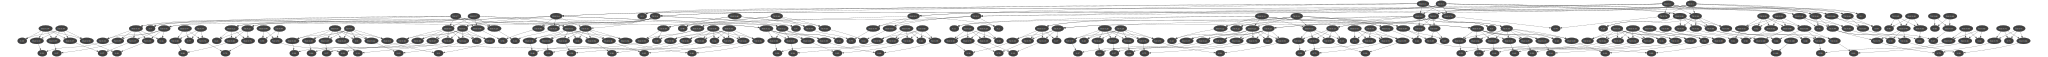

In [23]:
pview.gnb.showBN(list_bn[0], size=100)

Mal estimés : quasiment que des feuilles 
issue de couple avec cet unique enfant 
Pour l'instant, 1 noeud interne, enfant unique, et son fils est lui aussi
mal estimé 
Tj couple avec 1 personne qui vient d'etre créer

In [26]:
# all = []
# for i in ped.get_pedigree().keys():
#     p1 = marginalesSSTT[f'X{i}'][0]
#     p2 = ie1.posterior(f'X{i}')
#     
#     x1 = marginalesSSTT[f'matX{i}'][0]
#     x2 = ie1.posterior(f'matX{i}')
#     
#     y1 = marginalesSSTT[f'fatX{i}'][0]
#     y2 = ie1.posterior(f'fatX{i}')
#     
#     x = [abs(p1[0] - p2[0]),abs(p1[1] - p2[1]),abs(p1[2] - p2[2]),abs(p1[3] - p2[3])]
#     v = max(x)
#     
#     if ped.get_people(i).matID == '0':
#         mat = [abs(x1[0] - x2[0]),abs(x1[1] - x2[1])]
#         max_mat = max(mat)
#     else:
#         mat = [abs(x1[0] - x2[0]),abs(x1[1] - x2[1]),abs(x1[2] - x2[2]),
#                abs(x1[3] - x2[3]),abs(x1[4] - x2[4]),abs(x1[5] - x2[5]),
#                abs(x1[6] - x2[6]),abs(x1[7] - x2[7])]
#         max_mat = max(mat)
#     
#     if ped.get_people(i).fatID == '0':
#         fat = [abs(y1[0] - y2[0]),abs(y1[1] - y2[1])]
#         max_fat = max(fat)
#     else:
#         fat = [abs(y1[0] - y2[0]),abs(y1[1] - y2[1]),abs(y1[2] - y2[2]),
#                abs(y1[3] - y2[3]),abs(y1[4] - y2[4]),abs(y1[5] - y2[5]),
#                abs(y1[6] - y2[6]),abs(y1[7] - y2[7])]
#         max_fat = max(fat)
#     if v > 0.3 and v < 0.5:
#         all.append(f'X{i}')
#         
#     if max_mat > 0.3 :
#         all.append(f'matX{i}')
#     
#     if max_fat > 0.3 :
#         all.append(f'fatX{i}')

IndexError: index 2 is out of bounds for axis 0 with size 2

In [43]:
all = []
for i in ped.get_pedigree().keys():
    p1 = ttbn[f'X{i}'][0]
    p2 = lp.posterior(f'X{i}')
    
    x1 = ttbn[f'matX{i}'][0]
    x2 = lp.posterior(f'matX{i}')
    
    y1 = ttbn[f'fatX{i}'][0]
    y2 = lp.posterior(f'fatX{i}')
    
    x = [abs(p1[0] - p2[0]),abs(p1[1] - p2[1]),abs(p1[2] - p2[2]),abs(p1[3] - p2[3])]
    v = max(x)
    
    mat = [abs(x1[0] - x2[0]),abs(x1[1] - x2[1])]
    max_mat = max(mat)

    fat = [abs(y1[0] - y2[0]),abs(y1[1] - y2[1])]
    max_fat = max(fat)

    if v > 0.1:
        all.append(f'X{i}')
        
    if max_mat > 0.01 :
        all.append(f'matX{i}')
    
    if max_fat > 0.01 :
        all.append(f'fatX{i}')

In [44]:
all

['X67', 'X89', 'X93', 'X100']

In [11]:
list_ped1 = []
list_bn1 = []
bad_approx1 = []
inf_lazy1 = []
inf_ttbn1 = []

for nb in range (nb_ped):
        nbChild = random.randint(6,12)
        g = random.randint(2,4)
        ped = Pedigree()
        ped.gen_ped(nb, nb_people, g, nbChild, cl, 0.03)
        f = 0.05
        bn = pview.ped_to_bn(ped,0.05)
        list_bn1.append(bn)
        ie1 = pview.gum.LazyPropagation(bn)
        ie2 = ttbn.ttgum.ShaferShenoyTensorTrain(bn,precision=1e-4,info=False)
        marginalesSSTT, tempsSSTT, nb_param_SSTT = ie2.makeInference()
        list_ped1.append(ped)
        inf_lazy1.append(ie1)
        inf_ttbn1.append(marginalesSSTT)
        tab1 = []
        for i in ped.get_pedigree().keys():
            p1 = marginalesSSTT[f'X{i}'][0]
            p2 = ie1.posterior(f'X{i}')
            x = [abs(p1[0] - p2[0]),abs(p1[1] - p2[1]),abs(p1[2] - p2[2]),abs(p1[3] - p2[3])]
            v = max(x)
            if v > 0.3 and v < 0.5:
                tab1.append(f'X{i}')
        bad_approx1.append(tab1)
    

In [12]:
bad_approx1

[['X72', 'X83', 'X88', 'X90', 'X93'],
 [],
 ['X82'],
 ['X57', 'X75', 'X88', 'X93', 'X95', 'X98'],
 ['X73', 'X82', 'X87', 'X93']]

In [13]:
ie = pview.gum.LazyPropagation(list_bn1[4])
for i in list_ped1[4].get_pedigree().keys():
    #print(ie.posterior(f"X{i}"))
    print(list_bn1[4].cpt(f"fatX{i}"))

<fatX1:0> :: 0.95 /<fatX1:1> :: 0.05
<fatX2:0|fatX1:0|matX1:0|Sfat2:fat> :: 1 /<fatX2:1|fatX1:0|matX1:0|Sfat2:fat> :: 0 /<fatX2:0|fatX1:1|matX1:0|Sfat2:fat> :: 1 /<fatX2:1|fatX1:1|matX1:0|Sfat2:fat> :: 0 /<fatX2:0|fatX1:0|matX1:1|Sfat2:fat> :: 0 /<fatX2:1|fatX1:0|matX1:1|Sfat2:fat> :: 1 /<fatX2:0|fatX1:1|matX1:1|Sfat2:fat> :: 0 /<fatX2:1|fatX1:1|matX1:1|Sfat2:fat> :: 1 /<fatX2:0|fatX1:0|matX1:0|Sfat2:mat> :: 1 /<fatX2:1|fatX1:0|matX1:0|Sfat2:mat> :: 0 /<fatX2:0|fatX1:1|matX1:0|Sfat2:mat> :: 0 /<fatX2:1|fatX1:1|matX1:0|Sfat2:mat> :: 1 /<fatX2:0|fatX1:0|matX1:1|Sfat2:mat> :: 1 /<fatX2:1|fatX1:0|matX1:1|Sfat2:mat> :: 0 /<fatX2:0|fatX1:1|matX1:1|Sfat2:mat> :: 0 /<fatX2:1|fatX1:1|matX1:1|Sfat2:mat> :: 1
<fatX3:0> :: 0.95 /<fatX3:1> :: 0.05
<fatX4:0|fatX5:0|matX5:0|Sfat4:fat> :: 1 /<fatX4:1|fatX5:0|matX5:0|Sfat4:fat> :: 0 /<fatX4:0|fatX5:1|matX5:0|Sfat4:fat> :: 1 /<fatX4:1|fatX5:1|matX5:0|Sfat4:fat> :: 0 /<fatX4:0|fatX5:0|matX5:1|Sfat4:fat> :: 0 /<fatX4:1|fatX5:0|matX5:1|Sfat4:fat> :: 1 /<fa

In [19]:
ie2 = ttbn.ttgum.ShaferShenoyTensorTrain(list_bn1[4],precision=1e-4,info=False)
marginalesSSTT, tempsSSTT, nb_param_SSTT = ie2.makeInference()
for i in list_ped1[4].get_pedigree().keys():
    print(marginalesSSTT[f'X{i}'][0])

[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.0475 0.0475 0.0025]
[0.9025 0.

In [6]:
ped_rh = Pedigree()
ped_rh.load('../../data/ped/famRh.ped')
bn_rh = pview.ped_to_bn_compact(ped_rh,0.05)
ie = pview.gum.LazyPropagation(bn_rh)
for i in ped_rh.get_pedigree().keys():
    #print(ie.posterior(f"fatX{i}"))
    print(bn_rh.cpt(f"fatX{i}"))

<fatX1:0> :: 0.95 /<fatX1:1> :: 0.05
<fatX2:0> :: 0.95 /<fatX2:1> :: 0.05
<fatX3:0|fatX1:0|matX1:0> :: 1 /<fatX3:1|fatX1:0|matX1:0> :: 0 /<fatX3:0|fatX1:1|matX1:0> :: 0.5 /<fatX3:1|fatX1:1|matX1:0> :: 0.5 /<fatX3:0|fatX1:0|matX1:1> :: 0.5 /<fatX3:1|fatX1:0|matX1:1> :: 0.5 /<fatX3:0|fatX1:1|matX1:1> :: 0 /<fatX3:1|fatX1:1|matX1:1> :: 1
<fatX4:0> :: 0.95 /<fatX4:1> :: 0.05
<fatX5:0|fatX3:0|matX3:0> :: 1 /<fatX5:1|fatX3:0|matX3:0> :: 0 /<fatX5:0|fatX3:1|matX3:0> :: 0.5 /<fatX5:1|fatX3:1|matX3:0> :: 0.5 /<fatX5:0|fatX3:0|matX3:1> :: 0.5 /<fatX5:1|fatX3:0|matX3:1> :: 0.5 /<fatX5:0|fatX3:1|matX3:1> :: 0 /<fatX5:1|fatX3:1|matX3:1> :: 1
<fatX6:0|fatX3:0|matX3:0> :: 1 /<fatX6:1|fatX3:0|matX3:0> :: 0 /<fatX6:0|fatX3:1|matX3:0> :: 0.5 /<fatX6:1|fatX3:1|matX3:0> :: 0.5 /<fatX6:0|fatX3:0|matX3:1> :: 0.5 /<fatX6:1|fatX3:0|matX3:1> :: 0.5 /<fatX6:0|fatX3:1|matX3:1> :: 0 /<fatX6:1|fatX3:1|matX3:1> :: 1
<fatX7:0|fatX3:0|matX3:0> :: 1 /<fatX7:1|fatX3:0|matX3:0> :: 0 /<fatX7:0|fatX3:1|matX3:0> :: 0.5 /<f